In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('US-pumpkins.csv')
# Display the first few rows of the dataset
print(data.head())

   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

In [6]:
# Check the summary statistics of the dataset
print(data.describe())

       Grade    Low Price   High Price   Mostly Low  Mostly High  Environment  \
count    0.0  1757.000000  1757.000000  1654.000000  1654.000000          0.0   
mean     NaN   124.571338   132.970939   128.170550   132.491802          NaN   
std      NaN    83.876591    89.524958    86.512161    88.442967          NaN   
min      NaN     0.240000     0.240000     0.240000     0.240000          NaN   
25%      NaN    24.000000    24.500000    24.625000    26.125000          NaN   
50%      NaN   140.000000   150.000000   147.000000   150.000000          NaN   
75%      NaN   180.000000   200.000000   185.000000   200.000000          NaN   
max      NaN   480.000000   480.000000   480.000000   480.000000          NaN   

       Quality  Condition  Appearance  Storage  Crop  Trans Mode  Unnamed: 24  
count      0.0        0.0         0.0      0.0   0.0         0.0          0.0  
mean       NaN        NaN         NaN      NaN   NaN         NaN          NaN  
std        NaN        NaN     

In [7]:
# Check the data types of each column
print(data.dtypes)

City Name           object
Type                object
Package             object
Variety             object
Sub Variety         object
Grade              float64
Date                object
Low Price          float64
High Price         float64
Mostly Low         float64
Mostly High        float64
Origin              object
Origin District     object
Item Size           object
Color               object
Environment        float64
Unit of Sale        object
Quality            float64
Condition          float64
Appearance         float64
Storage            float64
Crop               float64
Repack              object
Trans Mode         float64
Unnamed: 24        float64
Unnamed: 25         object
dtype: object


In [8]:
# Check for missing values
print(data.isnull().sum())

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64


In [20]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('US-pumpkins.csv')

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Display the updated DataFrame
print(data.head())


   City Name Type       Package      Variety Sub Variety  Grade       Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN 2017-04-29   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN 2017-05-06   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN 2016-09-24   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN 2016-09-24   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN 2016-11-05   

   Low Price  High Price  Mostly Low  ...  Quality Condition Appearance  \
0      270.0       280.0       270.0  ...      NaN       NaN        NaN   
1      270.0       280.0       270.0  ...      NaN       NaN        NaN   
2      160.0       160.0       160.0  ...      NaN       NaN        NaN   
3      160.0       160.0       160.0  ...      NaN       NaN        NaN   
4       90.0       100.0        90.0  ...      NaN       NaN        NaN   

  Storage Crop  Repack Trans Mode  Unnamed: 24  Unnamed: 25  Month  
0     NaN  

In [11]:
# Select the features (input variables)
features = data.drop('High Price', axis=1)

In [12]:
# Select the target variable
target = data['High Price']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load the dataset into a DataFrame
data = pd.read_csv('US-pumpkins.csv')

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Select the features (input variables)
numeric_columns = []
categorical_columns = ['Package', 'Variety', 'City Name', 'Month']

# Convert categorical variables to one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(data[categorical_columns]))
encoded_features.columns = encoder.get_feature_names_out(categorical_columns)

# Combine encoded categorical features
features = encoded_features

# Select the target variable
target = data['High Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [31]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1749.302397429449


In [34]:
# model evaluation using Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 41.824662550096555


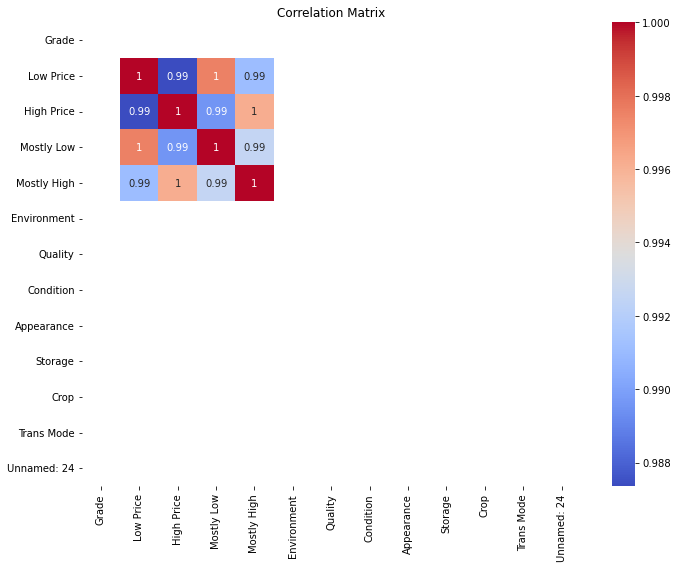

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
data = pd.read_csv('US-pumpkins.csv')

# Create a correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [40]:
import matplotlib.pyplot as plt

# Create scatter plot to visualize the relationship between numerical variables
numerical_columns = ['Min Price', 'Max Price']
data[numerical_columns].plot(kind='scatter', x='Min Price', y='Max Price')

plt.title('Scatter Plot - Min Price vs Max Price')
plt.xlabel('Min Price')
plt.ylabel('Max Price')

plt.show()


KeyError: "None of [Index(['Min Price', 'Max Price'], dtype='object')] are in the [columns]"